In [1]:
import pandas as pd
import px_reader as px
from helpers import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
etudiants_entrant = read_file('etudiants-entrant.px')
etudiants_entrant.index.names = ['annee', 'filiere', 'nationalite']
etudiants_entrant.head()

BS  BE  FR GE  LS  LU NE  \
annee filiere                         nationalite                             
1992  Theologie protestante           Suisse        7  24   0  6  10   0  3   
                                      Etranger     26   6   0  4   4   0  3   
      Theologie catholique-romaine    Suisse        0   0  21  0   0  28  0   
                                      Etranger      0   0  48  0   0   8  0   
      Theologie catholique-chretienne Suisse        0   1   0  0   0   0  0   

                                                  SG UZH USI EPFL ETHZ  \
annee filiere                         nationalite                        
1992  Theologie protestante           Suisse       0  23   0    0    0   
                                      Etranger     0   8   0    0    0   
      Theologie catholique-romaine    Suisse       0   0   0    0    0   
                                      Etranger     0   0   0    0    0   
      Theologie catholique-chretienne Suisse       0   0   0    0    0   

                                                  Autres IU  
annee filiere                         nationalite            
1992  Theologie protestante           Suisse              0  
                                      Etranger            0  
      Theologie catholique-romaine    Suisse              0  
                                      Etranger            0  
      Theologie catholique-chretienne Suisse              0

In [3]:
type_filiere = list(etudiants_entrant.index.get_level_values('filiere').unique())
years = list(etudiants_entrant.index.get_level_values('annee').unique())

In [4]:
etudiants_entrant = parse_df(etudiants_entrant, 3)

In [5]:
etudiants_entrant[['EPFL']].head()

EPFL
annee filiere                         nationalite      
1992  Theologie protestante           Suisse        0.0
                                      Etranger      0.0
      Theologie catholique-romaine    Suisse        0.0
                                      Etranger      0.0
      Theologie catholique-chretienne Suisse        0.0

In [6]:
def get_df_for_uni(uni, summarized = True):
    uni_df = pd.DataFrame(columns = ['Etranger', 'Suisse'])
    uni_df.insert(loc=0, column='annee', value=years)
    uni_df = uni_df.set_index('annee')
    tmp_df = etudiants_entrant[[uni]]
    if summarized:
        tmp_df = tmp_df.groupby(['annee', 'nationalite']).sum()
        for y in years:
            uni_df.loc[y] = list((tmp_df.loc[y][uni].reset_index())[uni])
        uni_df['Total'] = uni_df[['Etranger', 'Suisse']].sum(axis=1)
        return uni_df#.drop('Licences/Diplemes', axis = 1)
    else:
        return tmp_df

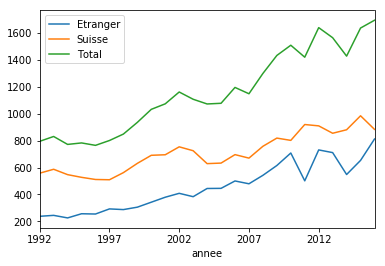

In [7]:
summ_uni = get_df_for_uni('EPFL')
summ_uni.plot(kind = 'line')